#Modelo Markowitz


In [ ]:
!pip install yfinance


In [ ]:

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar datos de precios de acciones
def get_stock_data(tickers, start_date, end_date):
    stock_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return stock_data

# Calcular rendimientos diarios
def calculate_daily_returns(stock_data):
    return stock_data.pct_change()

# Función para calcular los rendimientos y la matriz de covarianza
def calculate_returns_covariances(stock_data):
    returns = calculate_daily_returns(stock_data)
    cov_matrix = returns.cov()
    return returns, cov_matrix
# Función para calcular la cartera óptima de Markowitz
def markowitz_portfolio(returns, cov_matrix):
    num_assets = len(returns.columns)
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    mean_returns = returns.mean()
    port_return = np.sum(mean_returns * weights) * 252
    port_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

    return weights, port_return, port_std_dev  # Devolver los tres valores necesarios


[*********************100%%**********************]  4 of 4 completed


<ipython-input-4-6979eb3e4108>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results = np.array(results)


------ Estadísticas de la Cartera Óptima ------
Rendimiento Esperado de la Cartera Óptima: 0.5133399899645275
Volatilidad de la Cartera Óptima: 0.19784158210671224
Coeficiente de Sharpe de la Cartera Óptima: 2.4430657337941346
Asignación de activos en la Cartera Óptima:
AAPL: 67.29%
GOOGL: 14.38%
MSFT: 1.33%
AMZN: 17.00%
----------------------------------------------
------ Otras Estadísticas ------
Rendimiento Promedio de las Carteras: 0.5196355751313623
Volatilidad Promedio de las Carteras: 0.23117368054525236
Coeficiente de Sharpe Promedio de las Carteras: 2.1262265144387285
Volatilidad Mínima de las Carteras: 0.19612140532827027
Rendimiento Máximo de las Carteras: 0.5932018615913697
---------------------------------


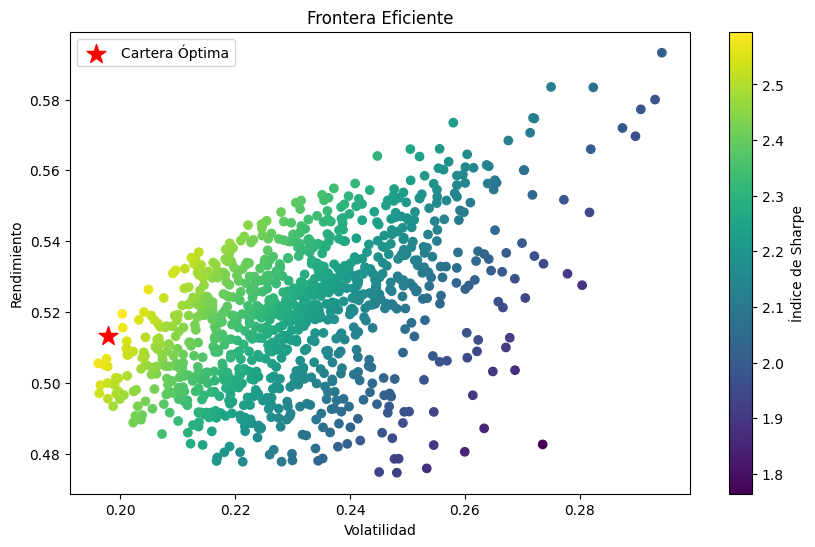

In [ ]:
if __name__ == "__main__":
    tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']  # Ejemplo de símbolos de acciones
    start_date = '2023-01-01'
    end_date = '2023-12-07'

    stock_data = get_stock_data(tickers, start_date, end_date)

    returns, cov_matrix = calculate_returns_covariances(stock_data)

    num_portfolios = 1000
    results = []
    for i in range(num_portfolios):
        weights, port_return, port_std_dev = markowitz_portfolio(returns, cov_matrix)
        results.append([port_return, port_std_dev, weights])

    results = np.array(results)
    max_sharpe_idx = np.argmax(results[:, 0] / results[:, 1])
    optimal_portfolio_return, optimal_portfolio_std_dev, _ = results[max_sharpe_idx]

    # Obtener cartera óptima
    optimal_weights, optimal_return, optimal_std_dev = results[max_sharpe_idx]

    # Rendimientos esperados y volatilidades de las carteras
    portfolio_returns = results[:, 0]
    portfolio_volatility = results[:, 1]

    # Calcular coeficiente de Sharpe para todas las carteras
    risk_free_rate = 0.03  # Ejemplo de tasa libre de riesgo
    sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_volatility

     # Obtener cartera óptima
    optimal_weights = results[max_sharpe_idx][2]

    # Imprimir estadísticas relevantes
    print("------ Estadísticas de la Cartera Óptima ------")
    print("Rendimiento Esperado de la Cartera Óptima:", optimal_portfolio_return)
    print("Volatilidad de la Cartera Óptima:", optimal_portfolio_std_dev)
    print("Coeficiente de Sharpe de la Cartera Óptima:", sharpe_ratios[max_sharpe_idx])
    print("Asignación de activos en la Cartera Óptima:")
    for i, ticker in enumerate(tickers):
        print(f"{ticker}: {optimal_weights[i]*100:.2f}%")
    print("----------------------------------------------")

    # Más estadísticas
    print("------ Otras Estadísticas ------")
    print("Rendimiento Promedio de las Carteras:", np.mean(portfolio_returns))
    print("Volatilidad Promedio de las Carteras:", np.mean(portfolio_volatility))
    print("Coeficiente de Sharpe Promedio de las Carteras:", np.mean(sharpe_ratios))
    print("Volatilidad Mínima de las Carteras:", np.min(portfolio_volatility))
    print("Rendimiento Máximo de las Carteras:", np.max(portfolio_returns))
    print("---------------------------------")


    plt.figure(figsize=(10, 6))
    plt.scatter(results[:, 1], results[:, 0], c=results[:, 0] / results[:, 1], marker='o', cmap='viridis')
    plt.colorbar(label='Índice de Sharpe')
    plt.title('Frontera Eficiente')
    plt.xlabel('Volatilidad')
    plt.ylabel('Rendimiento')
    plt.scatter(optimal_portfolio_std_dev, optimal_portfolio_return, c='red', marker='*', s=200, label='Cartera Óptima')
    plt.legend()
    plt.show()


#CAPM

In [ ]:
import numpy as np
import pandas as pd

# Función para calcular el rendimiento esperado utilizando CAPM
def calculate_expected_return(rf_rate, beta, market_return):
    expected_return = rf_rate + beta * (market_return - rf_rate)
    return expected_return

# Datos de ejemplo

rf_rate = risk_free_rate
beta = beta
market_return = market_return

# Calcular el rendimiento esperado utilizando CAPM
expected_return = calculate_expected_return(rf_rate, beta, market_return)

# Imprimir el resultado
print("Rendimiento esperado del activo (utilizando CAPM):", expected_return)


Rendimiento esperado del activo (utilizando CAPM): -0.046088380572075316


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Función para obtener datos de precios de cierre de acciones
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
    return stock_data

# Función para calcular beta utilizando regresión lineal
def calculate_beta(asset_returns, market_returns):
    cov_matrix = np.cov(asset_returns, market_returns)
    beta = cov_matrix[0, 1] / cov_matrix[1, 1]
    return beta

# Ejemplo de activo y mercado (S&P 500) y fechas de interés
ticker = 'AAPL'
market_ticker = '^GSPC'
start_date = '2023-11-4'
end_date = '2023-11-30'

# Obtener datos de precios de cierre
asset_data = get_stock_data(ticker, start_date, end_date)
market_data = get_stock_data(market_ticker, start_date, end_date)

# Calcular los retornos diarios
asset_returns = asset_data.pct_change().dropna()
market_returns = market_data.pct_change().dropna()

# Calcular beta mediante regresión lineal
beta = calculate_beta(asset_returns, market_returns)

# Imprimir el resultado
print("Beta del activo respecto al mercado:", beta)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta del activo respecto al mercado: 1.0208975515007555


In [ ]:
import yfinance as yf

# Símbolo para los bonos del Tesoro de EE. UU. a 10 años
symbol = '^TNX'

# Descarga de datos de la tasa de interés
data = yf.download(symbol, start='2023-11-4', end='2023-11-30')

# Muestra el último valor de la tasa de interés
risk_free_rate = data['Close'].iloc[-1]
print(f"Tasa libre de riesgo actual: {risk_free_rate}")


[*********************100%%**********************]  1 of 1 completed
Tasa libre de riesgo actual: 4.270999908447266


In [ ]:
data

In [ ]:
import yfinance as yf

# Función para obtener datos de precios de cierre de un índice de mercado
def get_market_data(market_ticker, start_date, end_date):
    market_data = yf.download(market_ticker, start=start_date, end=end_date)['Adj Close']
    return market_data

# Ejemplo con el índice S&P 500 y fechas de interés
market_ticker = '^GSPC'  # Índice S&P 500
start_date = '2023-11-4'
end_date = '2023-11-30'

# Obtener datos de precios de cierre del índice
market_data = get_market_data(market_ticker, start_date, end_date)

# Calcular el retorno total del mercado
market_return = (market_data.iloc[-1] / market_data.iloc[0]) - 1

# Imprimir el resultado
print("Retorno total del mercado en el período:", market_return)


[*********************100%%**********************]  1 of 1 completed
Retorno total del mercado en el período: 0.04228148055695624


In [ ]:
# Betas de cada activo en la cartera
beta_aapl = 1.2
beta_googl = 1.5
beta_msft = 1.0

# Pesos de cada activo en la cartera (suponiendo que la cartera está equitativamente distribuida)
weight_aapl = 1/3
weight_googl = 1/3
weight_msft = 1/3

# Calcular el beta de la cartera
portfolio_beta = (beta_aapl * weight_aapl) + (beta_googl * weight_googl) + (beta_msft * weight_msft)

# Imprimir el resultado
print("Beta de la cartera:", portfolio_beta)


#Modelo Black Litterman

In [1]:
import numpy as np
import yfinance as yf

# Descargar datos históricos de precios
assets = ['AAPL', 'MSFT', 'GOOGL']  # Ejemplo de tickers de acciones
start_date = '2021-01-01'
end_date = '2022-01-01'

prices = yf.download(assets, start=start_date, end=end_date)['Adj Close']

# Calcular rendimientos esperados y matriz de covarianza
returns = prices.pct_change().dropna()
expected_returns = returns.mean()
cov_matrix = returns.cov()

# Pesos de mercado (igualmente ponderados)
num_assets = len(assets)
market_weights = np.array([1 / num_assets] * num_assets)

# Calcular el rendimiento esperado del mercado
market_return = np.dot(expected_returns, market_weights)

# Estimaciones del inversor
views = np.array([0.05, 0.03, 0.06])  # Ejemplo de opiniones del inversor sobre los activos
views_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Ejemplo de matriz de vistas
tau = 0.025  # Factor de confianza

# Cálculo de Black-Litterman
omega = np.dot(np.dot(views_matrix, tau), np.dot(cov_matrix, views_matrix.T))  # Varianza de las vistas
P = np.eye(num_assets) - views_matrix.T
BL_expected_returns = expected_returns + np.dot(np.dot(np.dot(cov_matrix, P.T), np.linalg.inv(np.dot(np.dot(P, cov_matrix), P.T) + omega)), (views - np.dot(views_matrix, expected_returns)))

# Mostrar los resultados
print("Rendimientos esperados originales:")
print(expected_returns)
print("\nRendimientos esperados de Black-Litterman:")
print(BL_expected_returns)


[*********************100%%**********************]  3 of 3 completed
Rendimientos esperados originales:
AAPL     0.001409
GOOGL    0.002181
MSFT     0.001855
dtype: float64

Rendimientos esperados de Black-Litterman:
AAPL     0.001409
GOOGL    0.002181
MSFT     0.001855
dtype: float64


# APT (Arbitrage Pricing Theory)

In [ ]:
import numpy as np
import pandas as pd

# Datos de los activos y factores de riesgo
datos_activos = pd.DataFrame({
    'Activo 1': [0.05, 0.04, 0.03],
    'Activo 2': [0.07, 0.06, 0.05],
    'Activo 3': [0.06, 0.08, 0.09]
})

datos_factores_riesgo = pd.DataFrame({
    'Factor 1': [0.03, 0.02, 0.01],
    'Factor 2': [0.01, 0.02, 0.03],
    'Factor 3': [0.02, 0.01, 0.03]
})

# Calculando los pesos para los factores de riesgo (mediante regresión lineal)
factor_returns = np.linalg.lstsq(datos_factores_riesgo.values, datos_activos.values, rcond=None)[0]

# Calcular el retorno esperado de los activos
retorno_esperado = datos_factores_riesgo.dot(factor_returns.T)

# Mostrar los retornos esperados
print("Retorno esperado de los activos:")
print(retorno_esperado)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Obtener datos de Yahoo Finance para activos y factores de riesgo
tickers = ['AAPL', 'MSFT', 'GOOGL']  # Lista de tickers de activos
factor_tickers = ['^GSPC', '^IXIC', '^TNX']  # Lista de tickers de factores de riesgo

# Obtener datos históricos de los activos y factores de riesgo
activos = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']
factores_riesgo = yf.download(factor_tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

# Calcular los retornos diarios de los activos y factores de riesgo
returns_activos = activos.pct_change().dropna()
returns_factores = factores_riesgo.pct_change().dropna()

# Realizar la regresión lineal para obtener los pesos de los factores de riesgo
factor_returns = np.linalg.lstsq(returns_factores.values, returns_activos.values.T, rcond=None)[0]

# Calcular el retorno esperado de los activos
retorno_esperado = returns_factores.dot(factor_returns.T)

# Mostrar los retornos esperados
print("Retorno esperado de los activos basado en APT:")
print(retorno_esperado)


# Modelo de Gordon-Shapiro

In [ ]:
# Función para calcular el precio teórico utilizando el Modelo de Gordon-Shapiro
def gordon_shapiro_model(dividendo_actual, tasa_descuento, crecimiento_dividendos):
    precio_teorico = dividendo_actual * (1 + crecimiento_dividendos) / (tasa_descuento - crecimiento_dividendos)
    return precio_teorico

# Datos iniciales
dividendo_actual = 5.0  # Dividendo actual por acción
tasa_descuento = 0.1  # Tasa de descuento (costo de capital)
crecimiento_dividendos = 0.05  # Tasa de crecimiento esperada de los dividendos

# Calcular el precio teórico utilizando el Modelo de Gordon-Shapiro
precio_calculado = gordon_shapiro_model(dividendo_actual, tasa_descuento, crecimiento_dividendos)

# Mostrar el precio teórico calculado
print("El precio teórico de la acción según el Modelo de Gordon-Shapiro es:", precio_calculado)


# Modelo de descuento de flujos de efectivo (DCF)

In [ ]:
# Función para calcular el valor presente de los flujos de efectivo utilizando el método DCF
def calcular_dcf(flujos_efectivo, tasa_descuento):
    valor_presente = 0
    for i, flujo_efectivo in enumerate(flujos_efectivo):
        valor_presente += flujo_efectivo / ((1 + tasa_descuento) ** (i + 1))
    return valor_presente

# Datos iniciales
flujos_efectivo_anuales = [100, 150, 200, 250, 300]  # Flujos de efectivo anuales durante 5 años
tasa_descuento = 0.1  # Tasa de descuento (costo de capital o tasa de rendimiento requerida)

# Calcular el valor presente de los flujos de efectivo utilizando el método DCF
valor_presente_dcf = calcular_dcf(flujos_efectivo_anuales, tasa_descuento)

# Mostrar el valor presente calculado
print("El valor presente de los flujos de efectivo según el método DCF es:", valor_presente_dcf)


# Modelo de Regresión de Carhart Four Factor

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import statsmodels.api as sm

# Obtener datos históricos de los activos y factores de Carhart (por ejemplo, utilizando datos de Ken French's website)
# En este ejemplo, se utilizarán datos de acciones de Apple, Microsoft y el mercado general (S&P 500), y los factores de Carhart
start_date = '2022-01-01'
end_date = '2023-01-01'

# Descargar datos de Yahoo Finance para Apple, Microsoft y el S&P 500
apple_data = web.DataReader('AAPL', data_source='yahoo', start=start_date, end=end_date)['Adj Close']
microsoft_data = web.DataReader('MSFT', data_source='yahoo', start=start_date, end=end_date)['Adj Close']
sp500_data = web.DataReader('^GSPC', data_source='yahoo', start=start_date, end=end_date)['Adj Close']

# Descargar los factores de Carhart desde el sitio web de Ken French
factors_data = web.DataReader('F-F_Momentum_Factor_daily', 'famafrench', start=start_date, end=end_date)[0]

# Calcular los retornos diarios de los activos y factores
returns = pd.concat([apple_data.pct_change(), microsoft_data.pct_change(), sp500_data.pct_change(), factors_data], axis=1).dropna()
returns.columns = ['AAPL', 'MSFT', 'SP500', 'MOM']

# Modelo de cuatro factores de Carhart
X = returns[['SP500', 'SMB', 'HML', 'MOM']]
X = sm.add_constant(X)
y = returns['AAPL']  # Aquí se puede cambiar el activo a analizar (AAPL en este caso)

model = sm.OLS(y, X).fit()
print(model.summary())


# Modelo de Sharpe-Lintner-Black

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Obtener datos históricos de un activo financiero y datos de bonos del gobierno como activo libre de riesgo
start_date = '2022-01-01'
end_date = '2023-01-01'

# Descargar datos de Yahoo Finance para un activo (por ejemplo, Apple) y bonos del gobierno (por ejemplo, bonos del Tesoro de EE. UU.)
asset_data = web.DataReader('AAPL', data_source='yahoo', start=start_date, end=end_date)['Adj Close']
risk_free_data = web.DataReader('^TNX', data_source='yahoo', start=start_date, end=end_date)['Adj Close']  # Rendimiento de bonos del Tesoro a 10 años

# Calcular los retornos diarios del activo y los bonos del gobierno
asset_returns = asset_data.pct_change().dropna()
risk_free_returns = risk_free_data.pct_change().dropna()

# Calcular el rendimiento libre de riesgo
risk_free_rate = np.mean(risk_free_returns)

# Calcular el premio por riesgo de mercado (asumiendo S&P 500 como representación del mercado)
sp500_data = web.DataReader('^GSPC', data_source='yahoo', start=start_date, end=end_date)['Adj Close']
sp500_returns = sp500_data.pct_change().dropna()
market_risk_premium = np.mean(sp500_returns) - risk_free_rate

# Calcular el rendimiento promedio del activo
asset_average_return = np.mean(asset_returns)

# Calcular el premio por riesgo específico del activo
asset_specific_risk_premium = asset_average_return - risk_free_rate - market_risk_premium

print("Rendimiento libre de riesgo:", risk_free_rate)
print("Premio por riesgo de mercado:", market_risk_premium)
print("Premio por riesgo específico del activo:", asset_specific_risk_premium)


TypeError: string indices must be integers

# Modelo de Valoración de Activos de Ross (APT)

In [ ]:
import yfinance as yf
import numpy as np

# Obtener datos históricos de activos y factores de riesgo utilizando yfinance
tickers = ['AAPL', 'MSFT', '^GSPC']  # Activos (en este caso, Apple y Microsoft) y el S&P 500 como proxy del mercado
factor_tickers = ['^TNX', '^VIX']    # Factores de riesgo (en este caso, rendimiento de bonos y el índice de volatilidad VIX)

# Descargar datos de Yahoo Finance
assets_data = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']
factors_data = yf.download(factor_tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

# Calculando los rendimientos diarios de activos y factores de riesgo
returns_assets = assets_data.pct_change().dropna()
returns_factors = factors_data.pct_change().dropna()

# Definir los coeficientes beta (sensibilidades a los factores de riesgo) para cada activo
# Estos son valores hipotéticos y deben ser ajustados según el análisis y los datos específicos
betas = np.array([1.2, 0.8, 1.5])  # Coeficientes beta de los activos a los factores de riesgo

# Calcular el rendimiento libre de riesgo (asumiendo rendimiento de bonos a 10 años)
R_f = returns_factors['^TNX'].mean()

# Cálculo del rendimiento esperado de los activos utilizando el modelo APT
R_i = R_f + np.dot(betas, returns_factors.values.T)

print("Rendimiento esperado de los activos:")
print(R_i)


# Modelo de Valor en Riesgo (VaR)

In [ ]:
import yfinance as yf
import numpy as np

# Obtener datos históricos de un activo financiero utilizando yfinance
ticker = 'AAPL'  # Por ejemplo, Apple (AAPL)

# Descargar datos de Yahoo Finance
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')['Adj Close']

# Calcular los retornos diarios
returns = data.pct_change().dropna()

# Calcular el VaR con un nivel de confianza del 95% (z-score de 1.645 para un nivel de confianza del 95%)
conf_level = 0.95
z_score = 1.645  # Z-score para un nivel de confianza del 95%

# Calcular la desviación estándar de los retornos
volatility = np.std(returns)

# Calcular el VaR
portfolio_value = 1000000  # Valor inicial de la cartera
VaR = portfolio_value * volatility * z_score

print(f"El Valor en Riesgo (VaR) a un nivel de confianza del 95% es de: {VaR:.2f} USD")


# Modelos de Programación Lineal y No Lineal:

In [ ]:
import pulp

# Crear un problema de programación lineal
lp_problem = pulp.LpProblem("Mi problema de optimización", pulp.LpMaximize)

# Definir las variables
x = pulp.LpVariable('x', lowBound=0)  # Variable x con límite inferior 0
y = pulp.LpVariable('y', lowBound=0)  # Variable y con límite inferior 0

# Definir la función objetivo
lp_problem += 3 * x + 5 * y  # Función objetivo: 3x + 5y

# Definir las restricciones
lp_problem += 2 * x + 3 * y <= 12  # Restricción 1: 2x + 3y <= 12
lp_problem += -x + y <= 3         # Restricción 2: -x + y <= 3

# Resolver el problema
lp_problem.solve()

# Mostrar resultados
print("Estado:", pulp.LpStatus[lp_problem.status])
print("Valor de x:", pulp.value(x))
print("Valor de y:", pulp.value(y))
print("Valor óptimo:", pulp.value(lp_problem.objective))


In [ ]:
from scipy.optimize import minimize

# Definir la función objetivo y las restricciones
def objective_function(x):
    return x[0]**2 + x[1]**2  # Función objetivo: x^2 + y^2

# Condiciones iniciales
initial_guess = [1, 1]

# Resolver el problema de optimización no lineal
result = minimize(objective_function, initial_guess, method='SLSQP', constraints=({'type': 'ineq', 'fun': lambda x: x[0] + x[1] - 3},))

# Mostrar resultados
print("Estado:", result.message)
print("Valor óptimo de x:", result.x[0])
print("Valor óptimo de y:", result.x[1])
print("Valor óptimo de la función objetivo:", result.fun)
